In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 5-th order polynomial trajectory
def poly5_traj(t, t0, tf, p0, pf, v0, vf, a0, af):
    """
    :param t: time, linspace
    :param t0: start time, scalar
    :param tf: end time, scalar
    :param p0: start position, vector
    :param pf: end position, vector
    :param v0: start velocity, vector
    :param vf: end velocity, vector
    :param a0: start acceleration, vector
    :param af: end acceleration, vector
    :return: x, v, a
    """
    t = np.clip(t, t0, tf)
    dim = p0.shape[0]
    # convert to N*dim
    t = np.tile(t, (dim, 1)).T

    T = tf - t0  # total time
    T2 = T * T
    T3 = T2 * T
    T4 = T3 * T
    T5 = T4 * T

    h = pf - p0  # displacement

    # coefficients
    k0 = p0
    k1 = v0
    k2 = a0 / 2
    k3 = (20 * h - (8 * vf + 12 * v0) * T - (3 * a0 - af) * T2) / (2 * T3)
    k4 = (-30 * h + (14 * vf + 16 * v0) * T + (3 * a0 - 2 * af) * T2) / (2 * T4)
    k5 = (12 * h - 6*(vf + v0) * T + (af - a0) * T2) / (2 * T5)

    p = k0 + k1 * (t - t0) + k2 * (t - t0) ** 2 + k3 * (t - t0) ** 3 + k4 * (t - t0) ** 4 + k5 * (t - t0) ** 5
    v = k1 + 2 * k2 * (t - t0) + 3 * k3 * (t - t0) ** 2 + 4 * k4 * (t - t0) ** 3 + 5 * k5 * (t - t0) ** 4
    a = 2 * k2 + 6 * k3 * (t - t0) + 12 * k4 * (t - t0) ** 2 + 20 * k5 * (t - t0) ** 3

    return p, v, a


v max:  10.0
a max:  3.0018002002433892


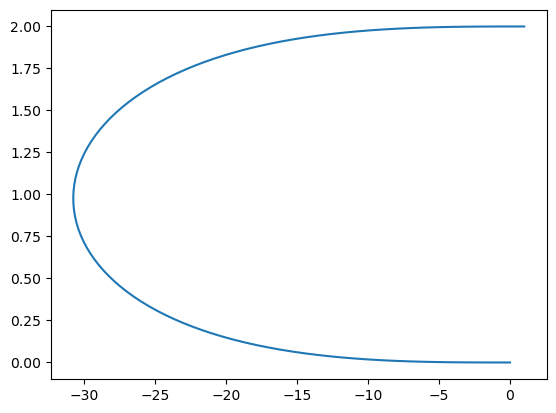

In [17]:
# given the initial and final state, compute the 2D trajectory, then plot it
t0 = 0
tf = 10

p0 = np.array([0,0])
pf = np.array([1,2])

v0 = np.array([-10,0])
vf = np.array([10,0])

a0 = np.array([0,0])
af = np.array([0,0])

t = np.linspace(t0, tf, 100)
p, v, a = poly5_traj(t, t0, tf, p0, pf, v0, vf, a0, af)

# print v max and a max
print('v max: ', np.max(np.linalg.norm(v, axis=1)))
print('a max: ', np.max(np.linalg.norm(a, axis=1)))

plt.figure()
plt.plot(p[:, 0], p[:, 1])
plt.show()

In [18]:
# 7-th order polynomial trajectory
def poly7_traj(t, t0, tf, p0, pf, v0, vf, a0, af, j0, jf):
    """
    :param t: time, linspace
    :param t0: start time, scalar
    :param tf: end time, scalar
    :param p0: start position, vector
    :param pf: end position, vector
    :param v0: start velocity, vector
    :param vf: end velocity, vector
    :param a0: start acceleration, vector
    :param af: end acceleration, vector
    :param j0: start jerk, vector
    :param jf: end jerk, vector
    :return: x, v, a, j
    """
    t = np.clip(t, t0, tf)
    dim = p0.shape[0]
    # convert to N*dim
    t = np.tile(t, (dim, 1)).T

    T = tf - t0  # total time
    T2 = T * T
    T3 = T2 * T
    T4 = T3 * T
    T5 = T4 * T
    T6 = T5 * T
    T7 = T6 * T

    h = pf - p0  # displacement

    # coefficients
    k0 = p0
    k1 = v0
    k2 = a0 / 2
    k3 = j0 / 6
    k4 = (210 * h - T * ((30*a0 - 15*af)*T + (4*j0 + jf)*T2 + 120*v0 + 90*vf)) / (6*T4)
    k5 = (-168*h + T*((20*a0 - 14*af)*T + (2*j0 + jf)*T2 + 90*v0 + 78*vf)) / (2*T5)
    k6 = (420*h - T*((45*a0 - 39*af)*T + (4*j0 + 3*jf)*T2 + 216*v0 + 204*vf)) / (6*T6)
    k7 = (-120*h + T*((12*a0 - 12*af)*T + (j0 + jf)*T2 + 60*v0 + 60*vf)) / (6*T7)

    p = k0 + k1 * (t - t0) + k2 * (t - t0) ** 2 + k3 * (t - t0) ** 3 + k4 * (t - t0) ** 4 + k5 * (t - t0) ** 5 + k6 * (t - t0) ** 6 + k7 * (t - t0) ** 7
    v = k1 + 2 * k2 * (t - t0) + 3 * k3 * (t - t0) ** 2 + 4 * k4 * (t - t0) ** 3 + 5 * k5 * (t - t0) ** 4 + 6 * k6 * (t - t0) ** 5 + 7 * k7 * (t - t0) ** 6
    a = 2 * k2 + 6 * k3 * (t - t0) + 12 * k4 * (t - t0) ** 2 + 20 * k5 * (t - t0) ** 3 + 30 * k6 * (t - t0) ** 4 + 42 * k7 * (t - t0) ** 5
    j = 6 * k3 + 24 * k4 * (t - t0) + 60 * k5 * (t - t0) ** 2 + 120 * k6 * (t - t0) ** 3 + 210 * k7 * (t - t0) ** 4

    return p, v, a, j

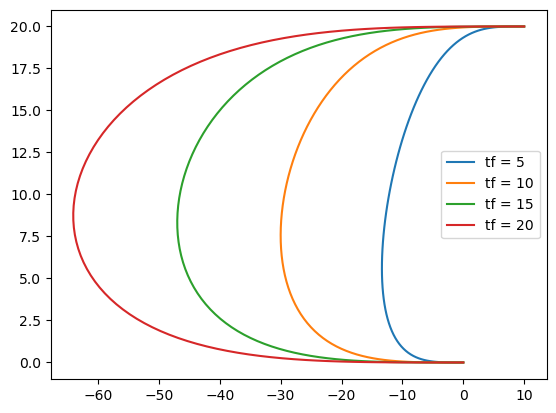

In [19]:
# given the initial and final state, compute the 2D trajectory, then plot it
t0 = 0
tf = 5

p0 = np.array([0, 0])
pf = np.array([10, 20])

v0 = np.array([-10, 0])
vf = np.array([10, 0])

a0 = np.array([0, 0])
af = np.array([0, 0])

j0 = np.array([0, 0])
jf = np.array([0, 0])

# plot the trajectory which tf = 5,10,15,20 in the same figure
plt.figure()

for tf in [5, 10, 15, 20]:
    t = np.linspace(t0, tf, 100)
    p, v, a, j = poly7_traj(t, t0, tf, p0, pf, v0, vf, a0, af, j0, jf)

    plt.plot(p[:, 0], p[:, 1], label=f'tf = {tf}')

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


angle=90.00	 length=195.94	 max a=3.25	 max v=15.00	 min v=6.92 	 avg v=9.85 	 avg a=2.34
angle=60.00	 length=196.67	 max a=2.57	 max v=15.00	 min v=6.56 	 avg v=9.89 	 avg a=2.00
angle=45.00	 length=195.16	 max a=2.27	 max v=15.00	 min v=5.02 	 avg v=9.81 	 avg a=1.82
angle=36.00	 length=193.74	 max a=2.17	 max v=15.00	 min v=4.06 	 avg v=9.74 	 avg a=1.72
angle=30.00	 length=192.63	 max a=2.17	 max v=15.00	 min v=3.40 	 avg v=9.69 	 avg a=1.66


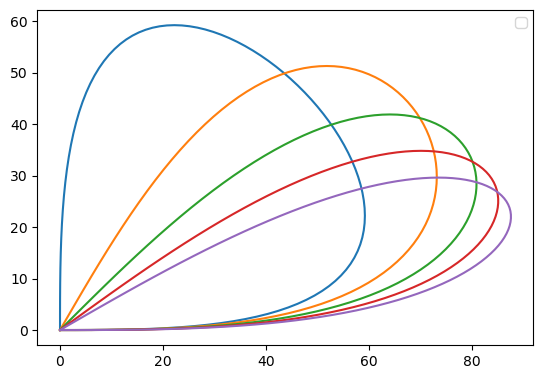

In [32]:
# given the initial and final state, compute the 2D trajectory, then plot it
t0 = 0
tf = 20

p0 = np.array([0,0])
pf = np.array([0,0])

speed = 15
v0 = np.array([speed,0])

a0 = np.array([0,0])  # acc should be zero at the intersection to maintain stability of camera
af = np.array([0,0])

j0 = np.array([0,0])
jf = np.array([0,0])

t = np.linspace(t0, tf, 100)

plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
for i in range(2,7):
    intersection_angle = np.pi / i
    vf = np.array([-np.cos(intersection_angle)*speed, -np.sin(intersection_angle)*speed])
    p, v, a = poly5_traj(t, t0, tf, p0, pf, v0, vf, a0, af)
    # calculate length of trajectory
    length = 0
    for i in range(1, len(p)):
        length += np.linalg.norm(p[i] - p[i-1])
    print(f"angle={np.rad2deg(intersection_angle):.2f}\t length={length:.2f}\t "
    f"max a={np.max(np.linalg.norm(a, axis=1)):.2f}\t max v={np.max(np.linalg.norm(v, axis=1)):.2f}\t"
    f" min v={np.min(np.linalg.norm(v, axis=1)):.2f} \t avg v={np.mean(np.linalg.norm(v, axis=1)):.2f} \t avg a={np.mean(np.linalg.norm(a, axis=1)):.2f}")
    plt.plot(p[:, 0], p[:, 1])

plt.legend()